In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import statsmodels.stats.api as sms
from scipy.stats import (ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu,
                         pearsonr, spearmanr, kendalltau, f_oneway, kruskal)
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multicomp import MultiComparison


In [ ]:
# TODO : Import the Data from the kaggle API

In [2]:
df = pd.read_csv('AB_Test_Results.csv', sep=',')

# Data Understanding

In [ ]:
#TODO : compute the following : DataFrame Information, Columns in DataFrame, Counting Missing Values, Descriptive Statistics, Value Counts for VARIANT_NAME, Counting Unique Users in USER_ID

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [4]:
print(df.columns)


Index(['USER_ID', 'VARIANT_NAME', 'REVENUE'], dtype='object')


In [5]:
print(df.isnull().sum())


USER_ID         0
VARIANT_NAME    0
REVENUE         0
dtype: int64


In [6]:
print(df.describe())


            USER_ID       REVENUE
count  10000.000000  10000.000000
mean    4981.080200      0.099447
std     2890.590115      2.318529
min        2.000000      0.000000
25%     2468.750000      0.000000
50%     4962.000000      0.000000
75%     7511.500000      0.000000
max    10000.000000    196.010000


In [7]:
print(df['VARIANT_NAME'].value_counts())


VARIANT_NAME
variant    5016
control    4984
Name: count, dtype: int64


In [8]:
print(df['USER_ID'].nunique())


6324


In [9]:
print(df['USER_ID'].duplicated().sum())


3676


# Average Revenue by VARIANT_NAME

In [ ]:
#TODO

What if H0: M1 = M2 ?
What about H1: M1 1= M2 ?

In [10]:
from scipy.stats import ttest_ind

# Filter data for two specific variants
revenue_control = df[df["VARIANT_NAME"] == "control"]["REVENUE"]
revenue_variant = df[df["VARIANT_NAME"] == "variant"]["REVENUE"]

# Test t of Student
t_stat, p_value = ttest_ind(revenue_control, revenue_variant, equal_var=False)  # Welch’s t-test si variance inégale

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 1.268403803110966, P-value: 0.20469713432410777


P-value>0.05, so there is no significant difference in terms of average revenue between the 2 groups (control and variant).

# Assumptions Control:
*# 1- Normality Assumptions*
*# 2- Homogeneity of Variances Assumption*

In [ ]:
# TODO : test the normality of revenue data in two groups (variant and control) within your DataFrame df using the Shapiro-Wilk test, what can you conclude ?

In [11]:
# Shapiro-Wilk normality test
stat_variant, p_variant = shapiro(revenue_variant)
stat_control, p_control = shapiro(revenue_control)

print(f"Shapiro-Wilk Test (Variant): Statistic={stat_variant}, p-value={p_variant}")
print(f"Shapiro-Wilk Test (Control): Statistic={stat_control}, p-value={p_control}")

Shapiro-Wilk Test (Variant): Statistic=0.027033073451830147, p-value=2.7310104028899288e-95
Shapiro-Wilk Test (Control): Statistic=0.01833147442513483, p-value=2.4983285100057203e-95


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5016.
  res = hypotest_fun_out(*samples, **kwds)


P-value significantly lower than 0.05 for both groups, so both groups do not follow a normal distribution in terms of income.

In [ ]:
# TODO : test for the homogeneity of variances between two groups (variant and control) within your DataFrame df using the Levene's test,  what can you conclude ?

In [12]:
from scipy.stats import levene
#  Levene Test
stat, p_value = levene(revenue_variant, revenue_control)

print(f"Levene's Test: Statistic={stat}, p-value={p_value}")

Levene's Test: Statistic=1.6158565214488871, p-value=0.2037000785338918


With a P-value>0.05, We therefore have homogeneity of variances between the 2 groups.

# Non-Parametric Test (mannwhitneyu Test)

In [ ]:
# TODO : perform the Mann-Whitney U test for comparing the average revenue between the variant and control groups in your DataFrame, what can you conclude ?

In [13]:
from scipy.stats import mannwhitneyu
#  Mann-Whitney U Test
stat, p_value = mannwhitneyu(revenue_variant, revenue_control, alternative="two-sided")

print(f"Mann-Whitney U Test: Statistic={stat}, p-value={p_value}")

Mann-Whitney U Test: Statistic=12478180.0, p-value=0.47825247965294926


P-value>0.05 .

No significant difference between the incomes of the Variant and Control groups.

In [ ]:
# TODO : create a bar plot showing the average revenues by variant names using the seaborn library

<ipython-input-14-78064984e870>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_revenue, x="VARIANT_NAME", y="REVENUE", palette="viridis")


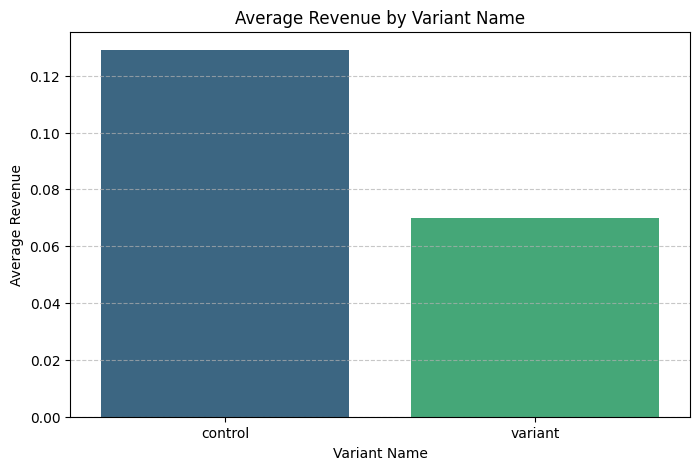

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculation of average revenue by variant
avg_revenue = df.groupby("VARIANT_NAME")["REVENUE"].mean().reset_index()

# Creation of the bar plot with Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_revenue, x="VARIANT_NAME", y="REVENUE", palette="viridis")

# Adding labels and title
plt.xlabel("Variant Name")
plt.ylabel("Average Revenue")
plt.title("Average Revenue by Variant Name")
plt.xticks(rotation=0)  # Rotation des labels si nécessaire
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Graphic display
plt.show()